In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
from requests.auth import HTTPBasicAuth
from pandas import json_normalize

In [2]:
paper_shop_csv = pd.read_csv("..\data\shop_paper_info.csv")
paper_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,1319533134,1319533134,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,1433462463,1433462463,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,...,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,1215602911,1215602911,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652160580,False,True,This Privacy Policy describes how and when I c...,4.9706,34.0
4,4,11704327,M2Originals,72915631,1480455584,1480455584,M2Originals,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2096,17781165,StoriesBySharpies,159534793,1529176714,1529176714,"prints, stationery, and anything lettered",We&#39;ve just rebranded! Expect lots of new a...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT EXCHANGES\nJust contact me wit...,NaN,NaN,0,False,False,NaN,NaN,NaN
2097,2097,14051083,OverflowByMelissa,18247583,1494443900,1494443900,Overflow by Melissa,If you would like more cards than the quantity...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,6.0
2098,2098,23565130,YourDayDIY,313931824,1629750978,1629750978,Premium Printable Templates,New digital shower and party invitation templa...,USD,False,...,DIGITAL DOWNLOADS\nYour files will be availabl...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...","ARE ANY PHYSICAL ITEMS SHIPPED?\nNo, you will ...",NaN,0,False,False,NaN,4.9762,42.0
2099,2099,21820580,ByDesignCustom,102102587,1575872311,1575872311,Create a life you love ✨,Hello! Thank you so much for visiting my shop!...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,NaN,NaN,0,False,False,NaN,3.0000,1.0


In [3]:
home_shop_csv = pd.read_csv("..\data\shop_home_info.csv")
home_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,6766412,ArtsyQuotes,19840612,1329442479,1329442479,HAND LETTERED HOME DECOR AND GIFTS,Thanks for coming to my hand-lettered print sh...,USD,False,...,Please allow 1-3 business days for custom prin...,"If you are not satisfied with your purchase, p...",NaN,NaN,1652182917,False,True,NaN,NaN,NaN
1,1,8718556,YourAncientName,38954524,1383184890,1383184890,Combining Historic Research With Hand Crafted Art,We&#39;re glad you&#39;re here! \r\n\r\nWhat&#...,USD,False,...,"Currently, I am offering free shipping for ord...","I sometimes have buyer&#39;s remorse too. So,...","ORDER EARLY, 3-4 WEEKS BEFORE YOU NEED A GIFT,...",NaN,1652149923,False,True,NaN,NaN,NaN
2,2,14333509,TrulyScripted,101112796,1483483904,1483483904,Truly Scripted Signs,WELCOME AND PLEASE **NOTE; Many More Listings ...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,1.0
3,3,18110774,BibleArtPrintables,162226534,1531784310,1531784310,"Printable Baptism Gifts, Scripture Wall Arts, ...",Spring Sale is now on!!\n*We sell digital prin...,CAD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9867,75.0
4,4,15800102,ShawnaClingerman,121658751,1506120055,1506120055,"Heart, Art & Design",VALENTINES DAY SALE 2022! Save 25% Monday 2/14...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT EXCHANGES\nJust contact me wit...,- Want to read my privacy policy? Check it out...,NaN,0,False,False,Want to read my privacy policy? Check it out o...,4.9818,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2295,10514292,papercasestudio,59805461,1422705835,1422705835,modern calligraphy for events + home,HEY hey—I&#39;m so glad you&#39;re here! We of...,USD,False,...,Shipping times range vary depending on the shi...,Refunds and/or exchanges cannot be accepted on...,We are taking extra precaution to ensure that ...,NaN,1652171582,False,True,NaN,4.7722,158.0
2296,2296,27646547,StellarPrintCo,442590673,1612404666,1612404666,minimalist downloadable art prints and happy v...,Follow on Insta to be the first to see new des...,USD,False,...,DIGITAL DOWNLOADS\nYour files will be availabl...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9897,97.0
2297,2297,6961230,BroussArt,22230797,1338770591,1338770591,Printable Party Invitations and More,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9401,384.0
2298,2298,22100270,HoldenANoteDesigns,9475303,1579386534,1579386534,NaN,NaN,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,12.0


In [4]:
wed_shop_csv = pd.read_csv("..\data\shop_wed_info.csv")
wed_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,7371868,DebiSementelli,17415724,1392845816,1392845816,Debi Sementelli,NaN,USD,False,...,I use CraftHub.me to handle delivery of the di...,Due to the nature of the products I sell – dig...,"When you purchase a one of my fonts, you are b...",NaN,1652924895,False,True,NaN,5.0000,1.0
1,1,6823707,HereAndNowPublishers,17098880,1332497934,1332497934,CalligraphyArts,Welcome to Here+Now! Offering calligraphy work...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,4.8966,58.0
2,2,15943136,mmcalligraphie,18096930,1504831099,1504831099,hand - lettered treasures | custom calligraphy,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT CANCELLATIONS\nRequest a cance...,NaN,NaN,0,False,False,NaN,5.0000,5.0
3,3,11630683,ScriptedSweetly,66215956,1441326736,1441326736,Calligraphy & Hand Lettering for Home Decor & ...,NaN,USD,False,...,NaN,NaN,NaN,NaN,1464892992,False,False,NaN,5.0000,3.0
4,4,14008975,thepaperedwedding,100636681,1479424518,1479424518,Printable and Paper Wedding Goods,Current Turnaround Time for Customized Items :...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,HAVE A PROBLEM PRINTING?\nIf you have a proble...,NaN,0,False,False,NaN,4.9670,1755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,549,7994445,NewallWright,5692445,1365668520,1365668520,WEDDINGS - GIFTS - VINTAGE,Welcome to Newall & Wright - The home of weddi...,GBP,False,...,Delivery is usually made within 3-5 working da...,Please only make a purchase when you are sure ...,NaN,NaN,1652920242,False,True,NaN,4.9870,231.0
550,550,22359916,Kaceique,277007841,1581530199,1581530199,Calligraphy Art and Design,NaN,SGD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",- Kaceique Privacy Policy\n\nThis Privacy Poli...,NaN,0,False,False,Kaceique Privacy Policy\n\nThis Privacy Policy...,NaN,NaN
551,551,13007264,LittlePagePaperCo,86810080,1465688251,1465688251,"Hand lettered wedding decor, stationery, and m...",NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9402,184.0
552,552,17598426,CoppertopCards,133109310,1551203152,1551203152,"Hand designed, modern calligraphy cards and in...",Thanks so much for visiting Coppertop Cards. I...,GBP,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,4.9914,465.0


In [134]:
pdList = [paper_shop_csv, home_shop_csv, wed_shop_csv]  # List of your dataframes
new_df = pd.concat(pdList)
no_dup_shops = new_df.drop_duplicates(subset=['user_id', 'shop_id', 'create_date'])
no_dup_shops

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,Thanks for visiting! I&#39;m taking some time ...,Thank you so much for your order! I will email...,Thank you so much for your order! Please feel ...,1655274024,1655274024,37,10,tinoiseau,True,Thanks for getting in touch! I&#39;m taking ti...,https://www.etsy.com/shop/tinoiseau,https://i.etsystatic.com/iusb/e5b0d2/16934921/...,1707,['en-US'],https://i.etsystatic.com/isla/6a13e5/17277046/...,False,False,False,True,True,False,True,True,1811,US,US,Welcome to my Policies! Please send me a convo...,I accept Etsy Direct Checkout and payment via ...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,1319533134,1319533134,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,I&#39;m away on vacation until the second of N...,Oh happy day!\r\n\r\nYour order has been place...,Oh happy day!\r\n\r\nYour order has been place...,1655745233,1655745233,194,0,JEdenCreations,True,NaN,https://www.etsy.com/shop/DaydreamPaperStudio,NaN,222,['en-US'],https://i.etsystatic.com/isla/326eb8/25623367/...,True,True,False,True,True,True,True,True,1022,US,GB,Hello and welcome to Daydream Paper Studio.,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,1433462463,1433462463,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,NaN,Thank you so much for your purchase! \r\n\r\nP...,Thank you!,1655794231,1655794231,265,0,LettersToYou,True,NaN,https://www.etsy.com/shop/LettersToYou,NaN,10375,['en-US'],https://i.etsystatic.com/isla/552c06/25360513/...,False,False,False,True,True,True,True,True,14634,US,US,NaN,NaN,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,1215602911,1215602911,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,NaN,Thank you very much for your order and thanks ...,Thank you for your purchase! \r\nIf you have a...,1655815862,1655815862,125,6,luciepritchard,True,hello. \r\nIf you have an urgent enquiry pleas...,https://www.etsy.com/shop/luciepritchard,https://i.etsystatic.com/iusb/0a0b03/53488674/...,474,['en-US'],https://i.etsystatic.com/isla/7efaa8/49791405/...,True,True,False,True,True,False,False,False,1244,NaN,GB,Welcome and thanks again for visiting my shop!...,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCE

In [135]:
all_df=no_dup_shops.reset_index(drop=True)
all_df

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,Thanks for visiting! I&#39;m taking some time ...,Thank you so much for your order! I will email...,Thank you so much for your order! Please feel ...,1655274024,1655274024,37,10,tinoiseau,True,Thanks for getting in touch! I&#39;m taking ti...,https://www.etsy.com/shop/tinoiseau,https://i.etsystatic.com/iusb/e5b0d2/16934921/...,1707,['en-US'],https://i.etsystatic.com/isla/6a13e5/17277046/...,False,False,False,True,True,False,True,True,1811,US,US,Welcome to my Policies! Please send me a convo...,I accept Etsy Direct Checkout and payment via ...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,1319533134,1319533134,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,I&#39;m away on vacation until the second of N...,Oh happy day!\r\n\r\nYour order has been place...,Oh happy day!\r\n\r\nYour order has been place...,1655745233,1655745233,194,0,JEdenCreations,True,NaN,https://www.etsy.com/shop/DaydreamPaperStudio,NaN,222,['en-US'],https://i.etsystatic.com/isla/326eb8/25623367/...,True,True,False,True,True,True,True,True,1022,US,GB,Hello and welcome to Daydream Paper Studio.,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,1433462463,1433462463,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,NaN,Thank you so much for your purchase! \r\n\r\nP...,Thank you!,1655794231,1655794231,265,0,LettersToYou,True,NaN,https://www.etsy.com/shop/LettersToYou,NaN,10375,['en-US'],https://i.etsystatic.com/isla/552c06/25360513/...,False,False,False,True,True,True,True,True,14634,US,US,NaN,NaN,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,1215602911,1215602911,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,NaN,Thank you very much for your order and thanks ...,Thank you for your purchase! \r\nIf you have a...,1655815862,1655815862,125,6,luciepritchard,True,hello. \r\nIf you have an urgent enquiry pleas...,https://www.etsy.com/shop/luciepritchard,https://i.etsystatic.com/iusb/0a0b03/53488674/...,474,['en-US'],https://i.etsystatic.com/isla/7efaa8/49791405/...,True,True,False,True,True,False,False,False,1244,NaN,GB,Welcome and thanks again for visiting my shop!...,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCE

In [43]:
#len(all_df['shop_id'].unique())

3935

In [136]:
#sorted_rev_ct=no_dup_shop.sort_values('review_count', ascending=False)
#highest_rev_ct = sorted_rev_ct['review_count'].nlargest(100)
#highest_rev_ct

In [143]:
all_df['created_timestamp'] = pd.to_datetime(all_df['created_timestamp'], unit='s')

all_df['create_date'] = pd.to_datetime(all_df['create_date'], unit='s')

all_df['updated_timestamp'] = pd.to_datetime(all_df['updated_timestamp'], unit='s')

all_df['update_date'] = pd.to_datetime(all_df['update_date'], unit='s')

In [144]:
pd.set_option('display.max_columns', None)
all_df

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,2009-08-17 04:59:57,2009-08-17 04:59:57,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,Thanks for visiting! I&#39;m taking some time ...,Thank you so much for your order! I will email...,Thank you so much for your order! Please feel ...,2022-06-15 06:20:24,2022-06-15 06:20:24,37,10,tinoiseau,True,Thanks for getting in touch! I&#39;m taking ti...,https://www.etsy.com/shop/tinoiseau,https://i.etsystatic.com/iusb/e5b0d2/16934921/...,1707,['en-US'],https://i.etsystatic.com/isla/6a13e5/17277046/...,False,False,False,True,True,False,True,True,1811,US,US,Welcome to my Policies! Please send me a convo...,I accept Etsy Direct Checkout and payment via ...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,2011-10-25 08:58:54,2011-10-25 08:58:54,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,I&#39;m away on vacation until the second of N...,Oh happy day!\r\n\r\nYour order has been place...,Oh happy day!\r\n\r\nYour order has been place...,2022-06-20 17:13:53,2022-06-20 17:13:53,194,0,JEdenCreations,True,NaN,https://www.etsy.com/shop/DaydreamPaperStudio,NaN,222,['en-US'],https://i.etsystatic.com/isla/326eb8/25623367/...,True,True,False,True,True,True,True,True,1022,US,GB,Hello and welcome to Daydream Paper Studio.,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,2015-06-05 00:01:03,2015-06-05 00:01:03,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,NaN,Thank you so much for your purchase! \r\n\r\nP...,Thank you!,2022-06-21 06:50:31,2022-06-21 06:50:31,265,0,LettersToYou,True,NaN,https://www.etsy.com/shop/LettersToYou,NaN,10375,['en-US'],https://i.etsystatic.com/isla/552c06/25360513/...,False,False,False,True,True,True,True,True,14634,US,US,NaN,NaN,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,2008-07-09 11:28:31,2008-07-09 11:28:31,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,NaN,Thank you very much for your order and thanks ...,Thank you for your purchase! \r\nIf you have a...,2022-06-21 12:51:02,2022-06-21 12:51:02,125,6,luciepritchard,True,hello. \r\nIf you have an urgent enquiry pleas...,https://www.etsy.com/shop/luciepritchard,https://i.etsystatic.com/iusb/0a0b03/53488674/...,474,['en-US'],https://i.etsystatic.com/isla/7efaa8/49791405/...,True,True,False,True,True,False,False,False,1244,NaN,GB,Welcome and thanks 

In [153]:
all_df['languages'] = all_df['languages'].str.replace('[','')
all_df['languages'] = all_df['languages'].str.replace(']','')
all_df['languages'] = all_df['languages'].str.replace("'",'')
all_df['languages'] = all_df['languages'].str.replace("'",'')
all_df['languages'].unique()

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_23868/1241295054.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_df['languages'] = all_df['languages'].str.replace('[','')
C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_23868/1241295054.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_df['languages'] = all_df['languages'].str.replace(']','')


array(['en-US', 'en-US, de, es, fr', 'en-US, it', 'en-US, ja',
       'en-US, fr', 'nl', 'en-US, es, ru, pt, ja, it, de, fr, nl',
       'de, en-US', 'en-US, es', 'de',
       'en-US, nl, fr, it, pt, es, de, ja, ru', 'en-US, fr, de',
       'en-US, nl, fr, de, it, ja, pl, pt, ru, es', 'en-US, fr, es', 'it',
       'fr, en-US', 'en-US, ru', 'en-US, nl, fr, de, it, ja, pt, ru, es',
       'en-US, de, es, fr, nl, it, ja, pt, ru',
       'en-US, es, pt, it, de, fr, nl, ja, ru', 'en-US, fr, nl',
       'en-US, nl', 'fr, en-US, ru', 'es, en-US', 'en-US, de',
       'it, en-US, de', 'en-US, de, fr, nl, es', 'en-US, de, it, es',
       'en-US, nl, fr, de, it, pt, ru, es', 'en-US, es, de',
       'en-US, nl, fr, de, it, pt, es', 'en-US, fr, de, ru',
       'en-US, fr, de, ja', 'en-US, de, fr, pl, nl, es, it',
       'en-US, de, pl'], dtype=object)

In [155]:
u = all_df['languages'].unique().tolist()
u

['en-US',
 'en-US, de, es, fr',
 'en-US, it',
 'en-US, ja',
 'en-US, fr',
 'nl',
 'en-US, es, ru, pt, ja, it, de, fr, nl',
 'de, en-US',
 'en-US, es',
 'de',
 'en-US, nl, fr, it, pt, es, de, ja, ru',
 'en-US, fr, de',
 'en-US, nl, fr, de, it, ja, pl, pt, ru, es',
 'en-US, fr, es',
 'it',
 'fr, en-US',
 'en-US, ru',
 'en-US, nl, fr, de, it, ja, pt, ru, es',
 'en-US, de, es, fr, nl, it, ja, pt, ru',
 'en-US, es, pt, it, de, fr, nl, ja, ru',
 'en-US, fr, nl',
 'en-US, nl',
 'fr, en-US, ru',
 'es, en-US',
 'en-US, de',
 'it, en-US, de',
 'en-US, de, fr, nl, es',
 'en-US, de, it, es',
 'en-US, nl, fr, de, it, pt, ru, es',
 'en-US, es, de',
 'en-US, nl, fr, de, it, pt, es',
 'en-US, fr, de, ru',
 'en-US, fr, de, ja',
 'en-US, de, fr, pl, nl, es, it',
 'en-US, de, pl']

In [156]:
all_df.to_csv('all_shops_no_dups.csv')

In [158]:
all_df['languages'] = all_df['languages'].apply(eval)

NameError: name 'en' is not defined

In [159]:
def to_1D(series): 
 return pd.Series([x for _list in series for x in _list])

In [160]:
to_1D(sorted_rev_ct['languages']).value_counts()

en-US    3023
de         35
es         31
fr         26
it         19
nl         16
ru         11
pt         10
ja          9
pl          4
dtype: int64

Text(0.5, 1.0, 'Lang')

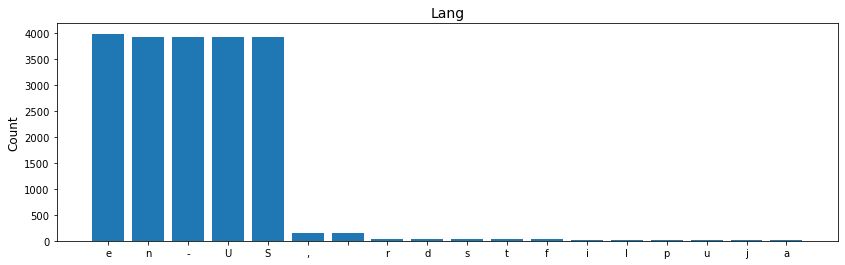

In [167]:
fig, ax = plt.subplots(figsize = (14,4)) 
ax.bar(to_1D(all_df['languages']).value_counts().index, 
        to_1D(all_df['languages']).value_counts().values) 
ax.set_ylabel("Count", size = 12) 
ax.set_title("Lang", size = 14)

In [211]:
lang = all_df['languages']
flat_id=list()
for sub_list in lang:
    flat_id += sub_list
flat = flat_id
flat

['e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 ',',
 ' ',
 'd',
 'e',
 ',',
 ' ',
 'e',
 's',
 ',',
 ' ',
 'f',
 'r',
 'e',
 'n',
 '-',
 'U',
 'S',
 ',',
 ' ',
 'i',
 't',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e',
 'n',
 '-',
 'U',
 'S',
 'e'

In [169]:
count = all_df['languages'].value_counts()
count

en-US                                        3854
en-US, es                                      13
de                                             12
en-US, fr                                       8
en-US, it                                       6
de, en-US                                       4
en-US, fr, es                                   3
en-US, de                                       3
nl                                              2
en-US, nl, fr, de, it, ja, pl, pt, ru, es       2
it                                              2
en-US, nl, fr, de, it, pt, ru, es               2
en-US, fr, de                                   2
en-US, fr, de, ja                               1
en-US, fr, de, ru                               1
es, en-US                                       1
en-US, de, fr, pl, nl, es, it                   1
en-US, nl, fr, de, it, pt, es                   1
en-US, es, de                                   1
en-US, de, it, es                               1


Text(0.5, 1.0, 'Lang')

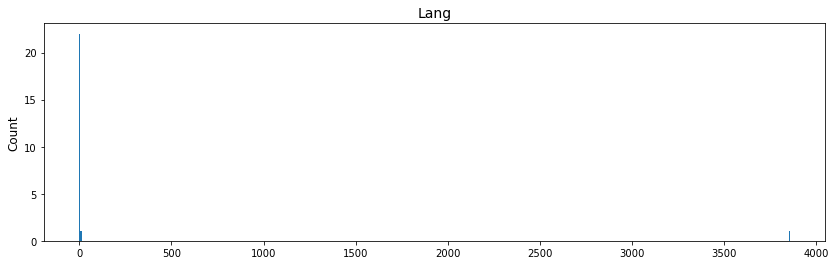

In [170]:
fig, ax = plt.subplots(figsize = (14,4)) 
ax.bar(count.value_counts().index, count.value_counts().values) 
ax.set_ylabel("Count", size = 12) 
ax.set_title("Lang", size = 14)

In [198]:
lang_expanded_v1 = all_df['languages'].apply(pd.Series)
lang_expanded_v1.info()
#pd.DataFrame(lang_expanded_v1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3935 non-null   object
dtypes: object(1)
memory usage: 30.9+ KB


In [210]:
L = all_df['languages'].explode().unique().tolist()
L

['en-US',
 'en-US, de, es, fr',
 'en-US, it',
 'en-US, ja',
 'en-US, fr',
 'nl',
 'en-US, es, ru, pt, ja, it, de, fr, nl',
 'de, en-US',
 'en-US, es',
 'de',
 'en-US, nl, fr, it, pt, es, de, ja, ru',
 'en-US, fr, de',
 'en-US, nl, fr, de, it, ja, pl, pt, ru, es',
 'en-US, fr, es',
 'it',
 'fr, en-US',
 'en-US, ru',
 'en-US, nl, fr, de, it, ja, pt, ru, es',
 'en-US, de, es, fr, nl, it, ja, pt, ru',
 'en-US, es, pt, it, de, fr, nl, ja, ru',
 'en-US, fr, nl',
 'en-US, nl',
 'fr, en-US, ru',
 'es, en-US',
 'en-US, de',
 'it, en-US, de',
 'en-US, de, fr, nl, es',
 'en-US, de, it, es',
 'en-US, nl, fr, de, it, pt, ru, es',
 'en-US, es, de',
 'en-US, nl, fr, de, it, pt, es',
 'en-US, fr, de, ru',
 'en-US, fr, de, ja',
 'en-US, de, fr, pl, nl, es, it',
 'en-US, de, pl']

In [189]:
c = all_df['currency_code'].unique().tolist()
c

['USD',
 'GBP',
 'EUR',
 'HKD',
 'CAD',
 'AUD',
 'NZD',
 'SGD',
 'SEK',
 'DKK',
 'VND',
 'IDR',
 'MYR',
 'ILS',
 'PHP',
 'TRY',
 'ZAR',
 'CHF']

In [192]:
c = (all_df['currency_code'].value_counts(normalize=True)*100).nlargest(5)
c

USD    78.526048
GBP    11.766201
CAD     3.761118
AUD     2.795426
EUR     2.312579
Name: currency_code, dtype: float64

In [180]:
c.to_csv('currencycode_top_5.csv')

In [186]:
b= pd.DataFrame(c)
b.reset_index()

,index,currency_code
0,USD,78.978583
1,GBP,11.268534
2,CAD,3.690280
3,EUR,2.734761
4,AUD,2.438221


In [188]:
plt.pie(c, labels= c['index']);

KeyError: 'index'

In [86]:
string=sorted_rev_ct['languages'][0]
string

"['en-US']"

In [87]:
sorted_rev_ct

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count,colD
4873,472,11355547,PersonalizationMall,8532479,2015-07-06 16:56:49,2015-07-06 16:56:49,"life, personalized.",NaN,USD,False,NaN,NaN,NaN,2022-06-21 21:14:25,2022-06-21 21:14:25,2927,0,PersonalizationMall,False,NaN,https://www.etsy.com/shop/PersonalizationMall,https://i.etsystatic.com/iusb/538851/53306824/...,4808,['en-US'],https://i.etsystatic.com/isla/739e33/42993118/...,True,True,False,True,True,True,True,True,205640,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",CUSTOM AND PERSONALIZED ORDERS\nReturns & Exch...,NaN,0,False,False,NaN,4.8474,22917.0,['en-US']
1558,1558,9609713,904Custom,49342455,2014-06-11 13:47:44,2014-06-11 13:47:44,"Personalized Gifts, Custom Stamps and Desk Pla...",Thank you for selecting 904 Custom for all of ...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you so much for your order!\r\n\r\nIf yo...,NaN,2022-06-21 17:44:15,2022-06-21 17:44:15,520,0,DesignsByJillEtsy,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/904Custom,https://i.etsystatic.com/iusb/45bcd2/24661003/...,11136,"['en-US', 'es']",https://i.etsystatic.com/isla/adafb0/45343297/...,False,False,False,True,True,True,True,True,203474,US,US,Welcome to my shop :),We accept anything Etsy accepts. :),Most orders are shipped using USPS First Class...,All products are made to order. No refunds unl...,NaN,NaN,1652136321,False,True,NaN,4.8303,11300.0,"['en-US', 'es']"
59,59,19242740,MandyLynnPlans,193982286,2019-01-19 01:33:39,2019-01-19 01:33:39,Helping you add some fun to your functional pl...,FREE shipping on all US orders over $35! \r\n\...,USD,False,Sorry you missed us!\r\nWe are closing the sho...,Thank you so much for your order! I really app...,NaN,2022-06-21 15:25:07,2022-06-21 15:25:07,1833,0,m8advqzg,True,Sorry you missed us!\r\nWe are closing the sho...,https://www.etsy.com/shop/MandyLynnPlans,https://i.etsystatic.com/iusb/121198/40303359/...,5002,['en-US'],https://i.etsystatic.com/isla/caab78/39758546/...,True,True,False,True,True,True,True,True,113047,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9925,9354.0,['en-US']
3761,1660,23359354,inspireddecorco,307470584,2020-05-19 21:36:02,2020-05-19 21:36:02,Custom-made Home Decor,Thank you visiting inspireddecorco! Our passio...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you for your purchase! Please take a mom...,NaN,2022-06-21 21:39:17,2022-06-21 21:39:17,1543,0,2rf79xaw,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/inspireddecorco,NaN,3366,['en-US'],https://i.etsystatic.com/isla/f6c240/51388136/...,True,True,False,True,True,True,True,True,42353,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- *Please double check the shipping address on...,NaN,0,False,False,*Please dou

In [91]:
import seaborn as sns
import numpy as np

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_23868/1186745104.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


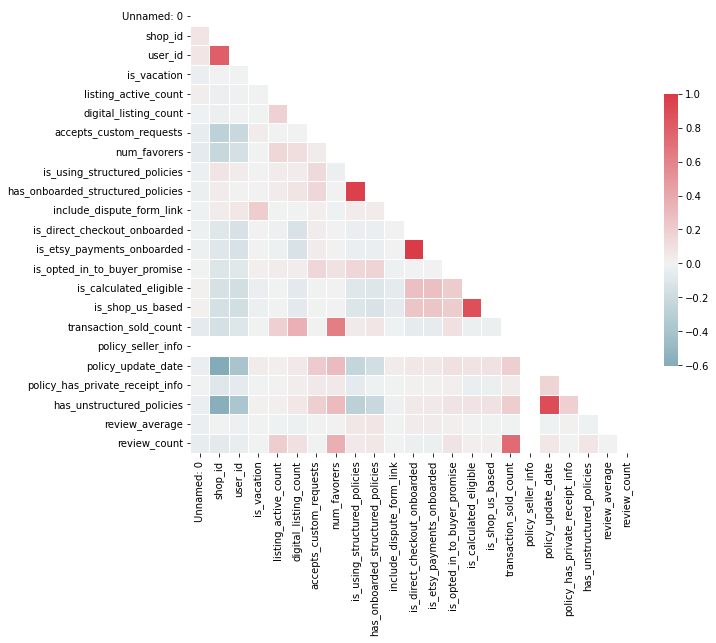

In [92]:
#looking for areas of strong correlation to dig into with deeper analysis
fig, ax = plt.subplots(figsize=(10, 10))
corr = sorted_rev_ct.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
          square=True, linewidths=.5, cbar_kws={"shrink": .5});